In [2]:
#Data Manipulation
import pandas as pd
import numpy as np
import json
import datetime
import calendar

#Data visualization
#import matplotlib.pyplot as plt
#%matplotlib inline
#plt.style.use('fivethirtyeight')
#colors_ref = ['#264653', '#2A9D8F', '#20706F', '#1E4D4E', '#8F2A39']
#plt.rc('xtick', labelsize=14)
#plt.rc('ytick', labelsize=14)

import seaborn as sns
import folium

#Script to download data
from dados_acidentes_PRF_downloader import get_dados_acidentes_PRF_BR

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

colors_ref = ['#1d3557', '#457b9d', '#a8dadc', '#e63946', '#f1faee']
plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(15,8))
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

In [4]:
def alterar_df(df):
    br_concessao = ['BR-381/MG', 'BR-381/SP', 
                 'BR-101/RJ', 
                 'BR-376/PR', 'BR-101/SC',
                 'BR-116/PR', 'BR-116/SC', 
                 'BR-116/SP', 'BR-116/PR', 
                 'BR-060/DF', 'BR-060/GO', 'BR-060/MG', 
                 'BR-153/DF', 'BR-153/GO', 'BR-153/MG', 
                 'BR-262/DF', 'BR-262/GO', 'BR-262/MG', 
                 'BR-040/MG', 'BR-040/RJ', 
                 'BR-116/RJ', 
                 'BR-101/ES', 'BR-101/BA', 
                 'BR-101/RJ', 
                 'BR-116/RS', 'BR-293/RS', 
                 'BR-050/GO', 'BR-050/MG', 
                 'BR-163/MS', 
                 'BR-116/RJ', 'BR-116/SP', 
                 'BR-393/RJ', 
                 'BR-163/MT', 
                 'BR-153/SP', 
                 'BR-040/DF', 'BR-040/GO', 'BR-040/MG', 
                 'BR-116/BA', 'BR-324/BA', 
                 'BR-101/RS', 'BR-290/RS', 'BR-386/RS', 'BR-448/RS']
    
    df_alterado = df.copy()
    df_alterado.rename(columns = {"data_inversa":"data"}, inplace = True)

    df_alterado['data'] = pd.to_datetime(df_alterado['data'], format = "%Y-%m-%d")
    df_alterado['horario'] = pd.to_datetime(df['horario'], format = "%H:%M:%S")
    
    df_alterado['dia_semana'] = df_alterado['data'].apply(lambda x: x.strftime('%w'))
    
    df_alterado["latitude"] = df_alterado["latitude"].str.replace(',','.').astype(float)
    df_alterado["longitude"] = df_alterado["longitude"].str.replace(',','.').astype(float)
    
    df_alterado.dropna(inplace=True)
    
    df_alterado["br"] = df_alterado["br"].apply(lambda x: str(round(x)))
    
    df_alterado["br_loc"] = "BR-" + df_alterado["br"] + "/" + df_alterado["uf"]
    df_alterado["concessoes"] = df_alterado["br_loc"].apply(lambda x: "privada" if x in br_concessao else "publica" )

    return df_alterado

In [5]:
df = pd.read_csv("data/datatran2023.csv", sep = ";", encoding = 'ISO-8859-1')

df_alterado = alterar_df(df)

df_alterado

,id,data,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,br_loc,concessoes
0,496519,2023-01-01,0,1900-01-01 02:00:00,ES,101,114,SOORETAMA,Ausência de reação do condutor,Saída de leito carroçável,...,0,1,1,-19.094849,-40.050958,SPRF-ES,DEL04-ES,UOP01-DEL04-ES,BR-101/ES,privada
1,496543,2023-01-01,0,1900-01-01 03:40:00,SP,116,"113,1",TAUBATE,Entrada inopinada do pedestre,Atropelamento de Pedestre,...,4,0,1,-23.044566,-45.582598,SPRF-SP,DEL02-SP,UOP02-DEL02-SP,BR-116/SP,privada
2,496590,2023-01-01,0,1900-01-01 01:40:00,MT,163,1112,GUARANTA DO NORTE,Reação tardia ou ineficiente do condutor,Tombamento,...,0,1,1,-9.700206,-54.875888,SPRF-MT,DEL06-MT,UOP03-DEL06-MT,BR-163/MT,privada
3,496610,2023-01-01,0,1900-01-01 10:40:00,PR,376,"314,8",ORTIGUEIRA,Velocidade Incompatível,Tombamento,...,0,0,1,-23.985512,-51.083555,SPRF-PR,DEL07-PR,UOP02-DEL07-PR,BR-376/PR,privada
4,496659,2023-01-01,0,1900-01-01 14:55:00,MG,116,"569,4",MANHUACU,Acumulo de água sobre o pavimento,Colisão frontal,...,0,2,2,-20.100075,-42.178841,SPRF-MG,DEL06-MG,UOP03-DEL06-MG,BR-116/MG,publica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38403,541876,2023-03-13,1,1900-01-01 18:10:00,ES,101,"293,6",CARIACICA,Ausência de sinalização,Atropelamento de Pedestre,...,0,1,1,-20.324159,-40.395290,SPRF-ES,DEL01-ES,UOP01-DEL01-ES,BR-101/ES,privada
38404,542057,2023-07-29,6,1900-01-01 10:00:00,GO,60,"164,8",GOIANIA,Velocidade Incompatível,Colisão traseira,...,0,0,2,-16.703600,-49.342000,SPRF-GO,DEL01-GO,UOP02-DEL01-GO,BR-60/GO,publica
38405,542058,2023-07-08,6,1900-01-01 18:50:00,PR,116,1,CAMPINA GRANDE DO SUL,Ausência de reação do condutor,Saída de leito carroçável,...,0,4,1,-25.063684,-48.570519,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,BR-116/PR,privada
38406,542112,2023-06-22,4,1900-01-01 05:25:00,MG,381,"746,5",TRES CORACOES,Condutor Dormindo,Saída de leito carroçável,...,0,1,1,-21.618761,-45.262445,SPRF-MG,DEL16-MG,UOP02-DEL16-MG,BR-381/MG,privada


In [6]:
def plot_bar(x, height, titulo, subtitulo = "", colors = colors_ref[0], rotation = 0, legend = "", x_labels = "", titulo_x_pos = 0, titulo_y_pos = 0,
            display_data = ""):
    
    x_ = x
    height_ = height
    legend_ = legend
    colors_ = colors
    rotation_ = rotation
    titulo_ = titulo
    subtitulo_ = subtitulo
    titulo_x_pos_ = titulo_x_pos
    titulo_y_pos_ = titulo_y_pos
    display_data_ = display_data
    
    fig, ax = plt.subplots();
    
    ax.bar(x = x_, 
           height = height_, 
           label = legend_,
           color = colors_,
           edgecolor="black",
           linewidth=1.5,);
    
    if x_labels != "":
        x_labels_ = x_labels
    else:
        x_labels_ = ax.get_xticklabels()
    
    ax.set_xticklabels(labels = x_labels_, 
                       rotation = rotation_,
                       weight = 'bold');
    
    if titulo_x_pos != 0:
        titulo_x_pos_ = titulo_x_pos
    else:
        titulo_x_pos_ = -2
    
    if titulo_y_pos != 0:
        titulo_y_pos_ = titulo_y_pos
    else: 
        titulo_y_pos_ = max(ax.get_yticks())
    
    ax.text(x = titulo_x_pos_ , y = titulo_y_pos_ * 1.2, 
            s = titulo_, 
            fontsize = 26, 
            weight = 'bold', horizontalalignment = "left")
    
    ax.text(x = titulo_x_pos_ , y = titulo_y_pos_ * 1.12, 
            s = subtitulo_, 
            fontsize = 18,  
            alpha = .85)
    
    for value, bar in enumerate(ax.patches):
        x = bar.get_x() + bar.get_width()/2
        y = bar.get_height() * 1.04
        
        if display_data_ == "percentage":
            display = f'{height_[value]/sum(height_)*100:.1f}%'
        else:
            display = height_[value]
            
        ax.text(x, y, 
                s = display, 
                fontsize = 12,
                weight = 'bold',
                horizontalalignment='center')

    if legend != "":
        ax.legend(loc="right");
    
    ax.xaxis.grid(False);
    
    plt.tight_layout();
    plt.show();

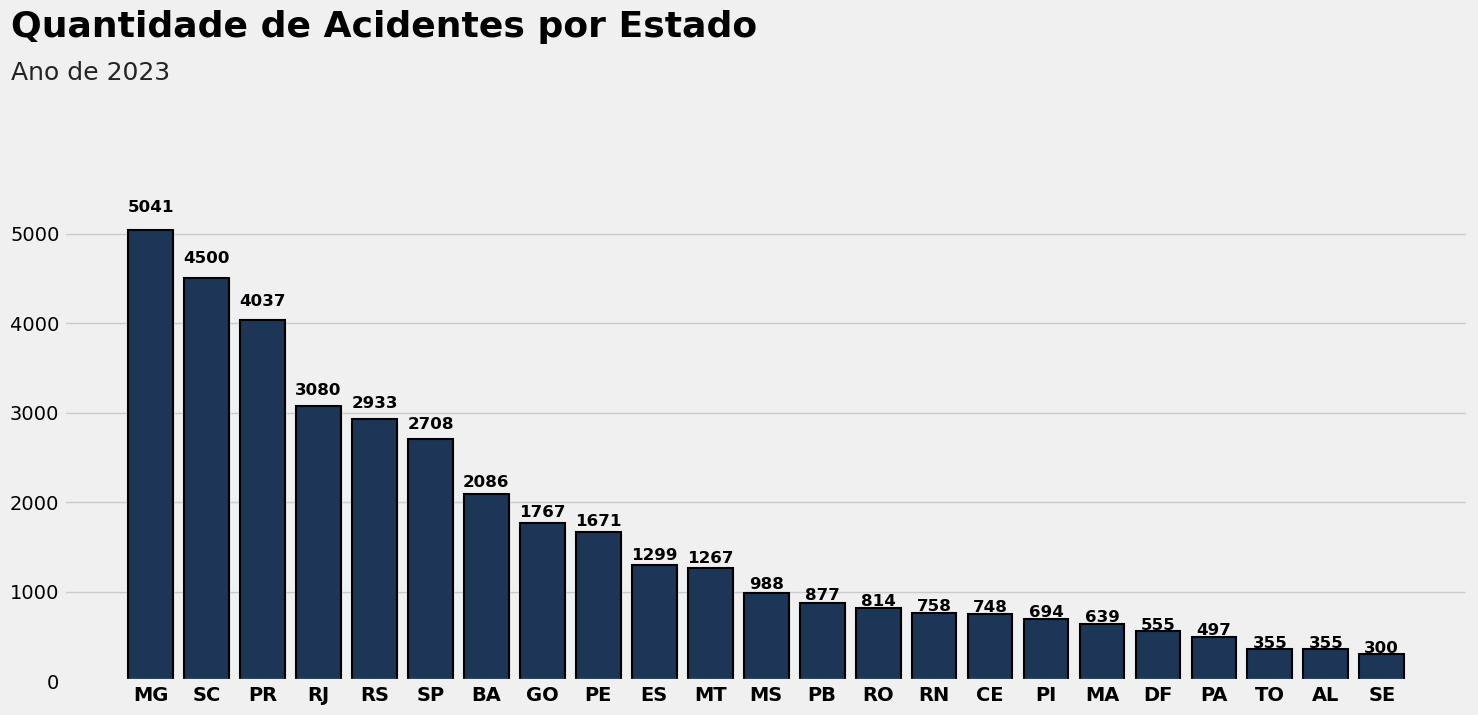

In [7]:
height = df_alterado['uf'].value_counts().values
estados = df_alterado['uf'].value_counts().index

plot_bar(estados, height,
         titulo = 'Quantidade de Acidentes por Estado', subtitulo = "Ano de 2023", 
         titulo_x_pos = -2.5);

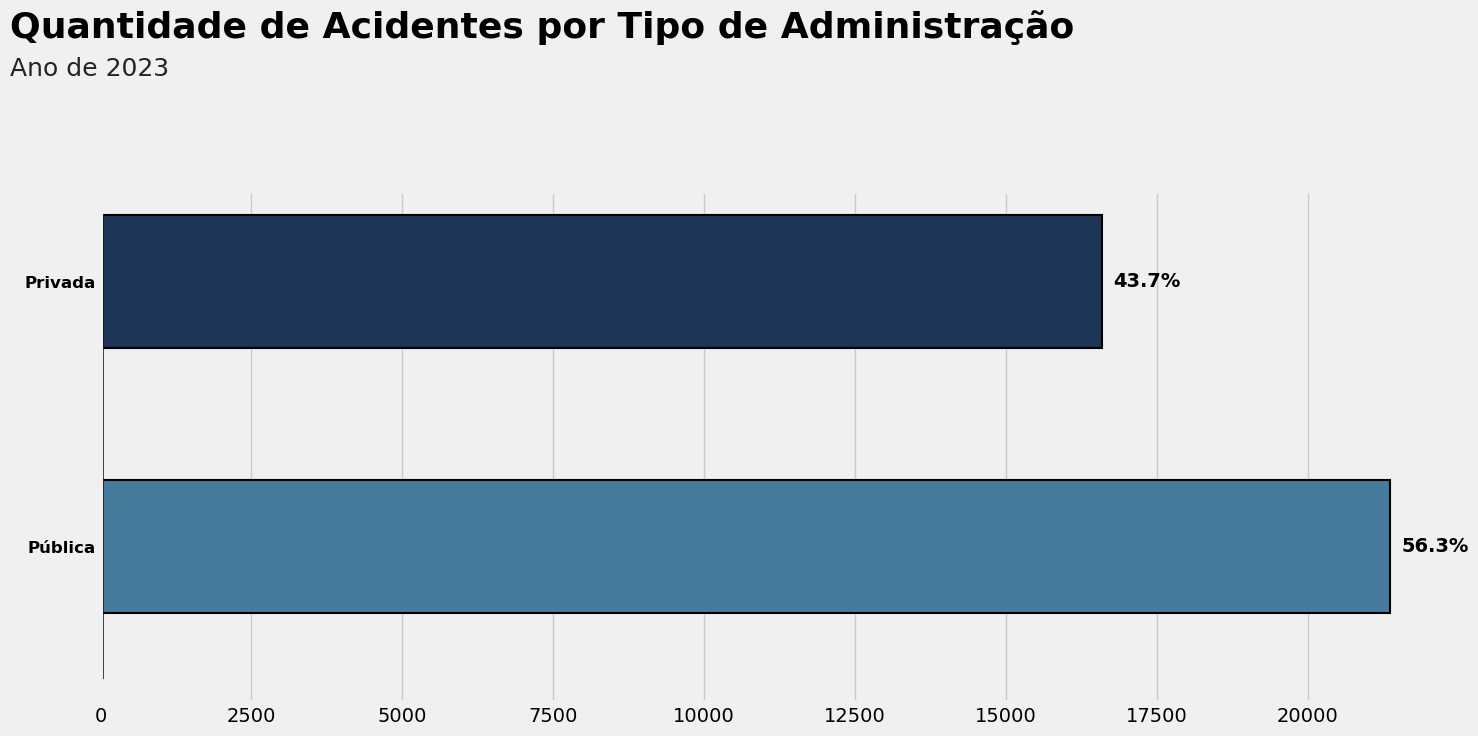

In [24]:
tipo_administracao = df_alterado["concessoes"].value_counts().index
width = df_alterado["concessoes"].value_counts().values

plot_hbar(tipo_administracao, width,
         titulo = 'Quantidade de Acidentes por Tipo de Administração', subtitulo = "Ano de 2023",
         y_labels = ['Pública', 'Privada'],
         colors = ['#457b9d', '#1d3557'],
         titulo_x_pos = -1500, titulo_y_pos = 1.6, 
         height = 0.5);

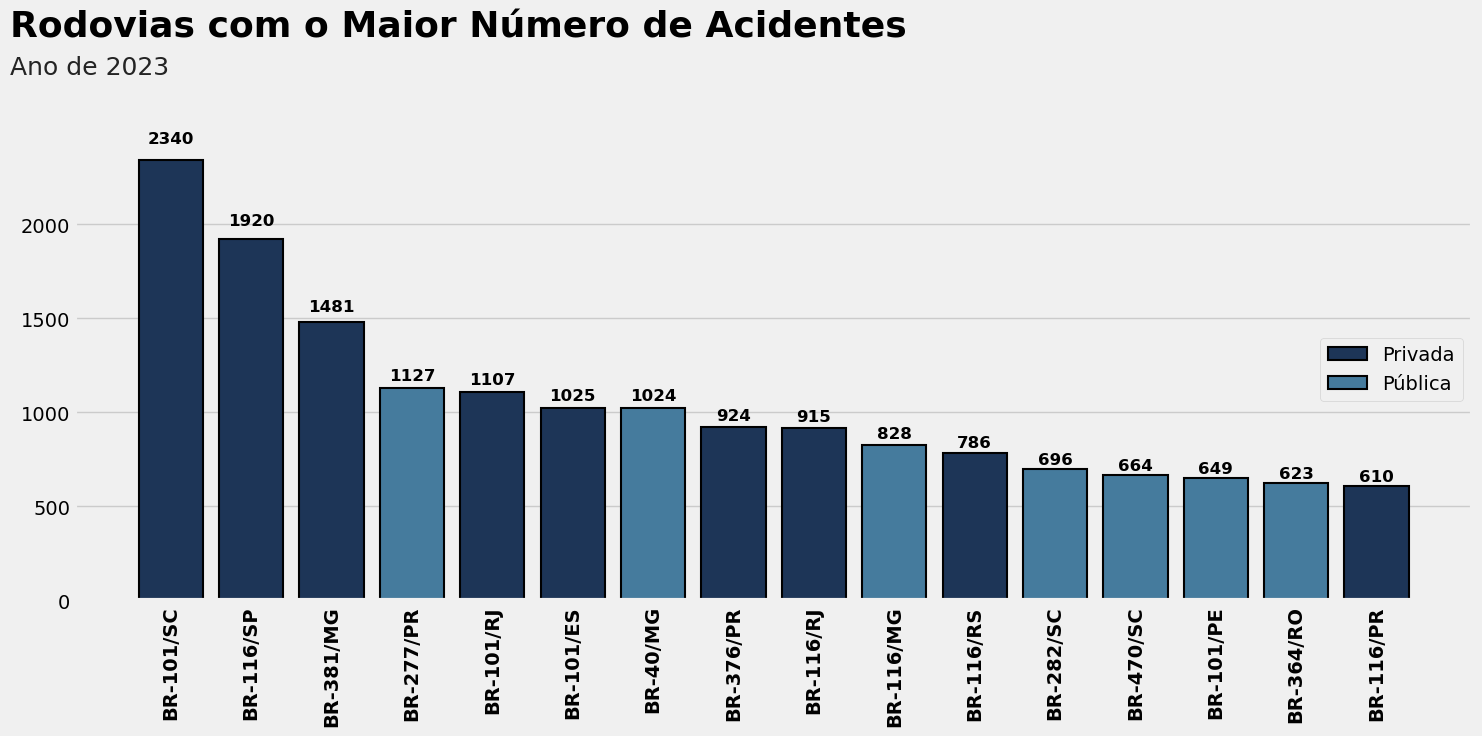

In [9]:
rodovias = df_alterado[['br_loc', 'concessoes']].value_counts().index.get_level_values('br_loc')[:16]
height = df_alterado[['br_loc', 'concessoes']].value_counts().values[:16]
labels = df_alterado[['br_loc', 'concessoes']].value_counts().index.get_level_values('concessoes')[:16]
colors = [colors_ref[0] if t == "privada" else colors_ref[1] for t in labels]
legend = ['Privada', '_privada', '_privada', 'Pública', '_privada', '_privada',
       '_publica', '_privada', '_privada', '_publica', '_privada', '_publica',
       '_publica', '_publica', '_publica', '_privada']

plot_bar(rodovias, height, 
         titulo = 'Rodovias com o Maior Número de Acidentes', subtitulo = "Ano de 2023", 
         colors = colors, rotation = 90, legend = legend);

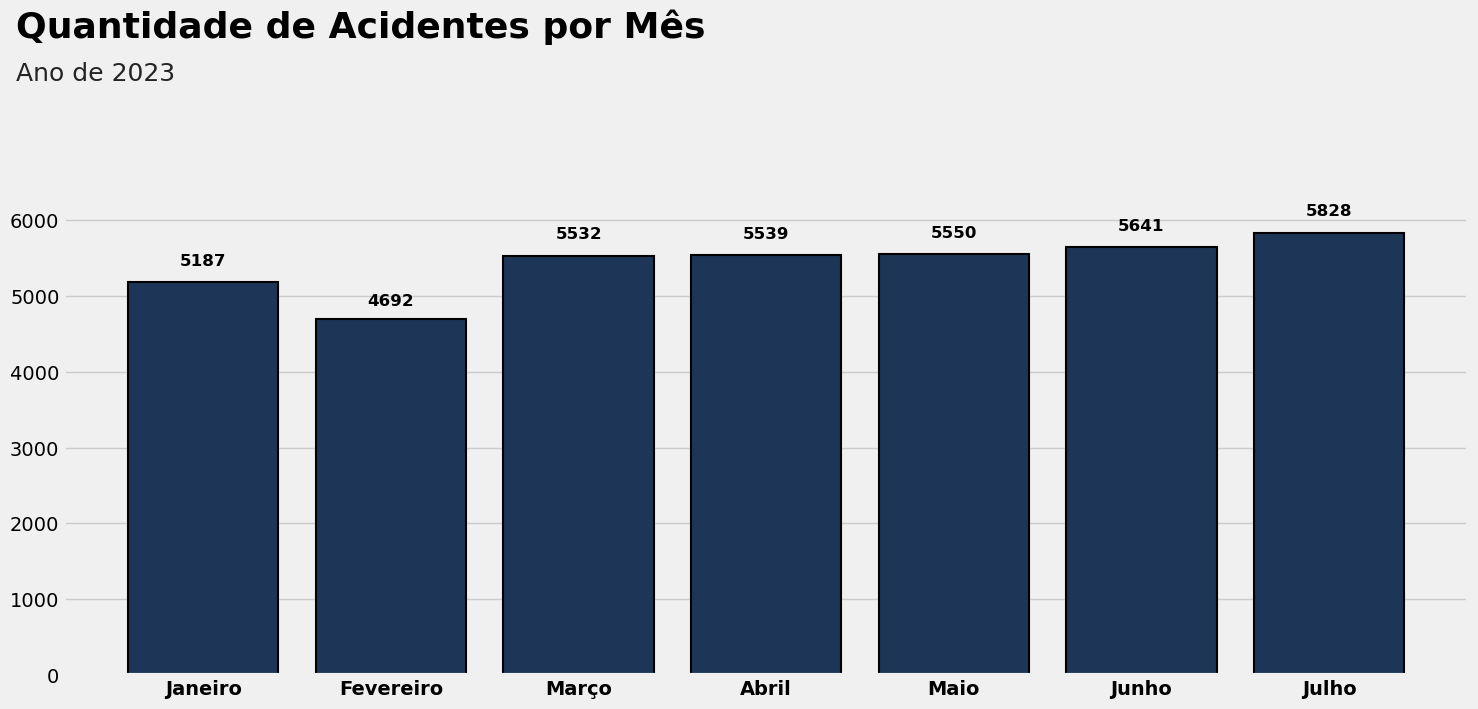

In [10]:
height = df_alterado['data'].dt.month.value_counts().sort_index().values
meses = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho"]

plot_bar(meses, height,
         titulo = 'Quantidade de Acidentes por Mês', subtitulo = "Ano de 2023", 
         titulo_x_pos = -1);

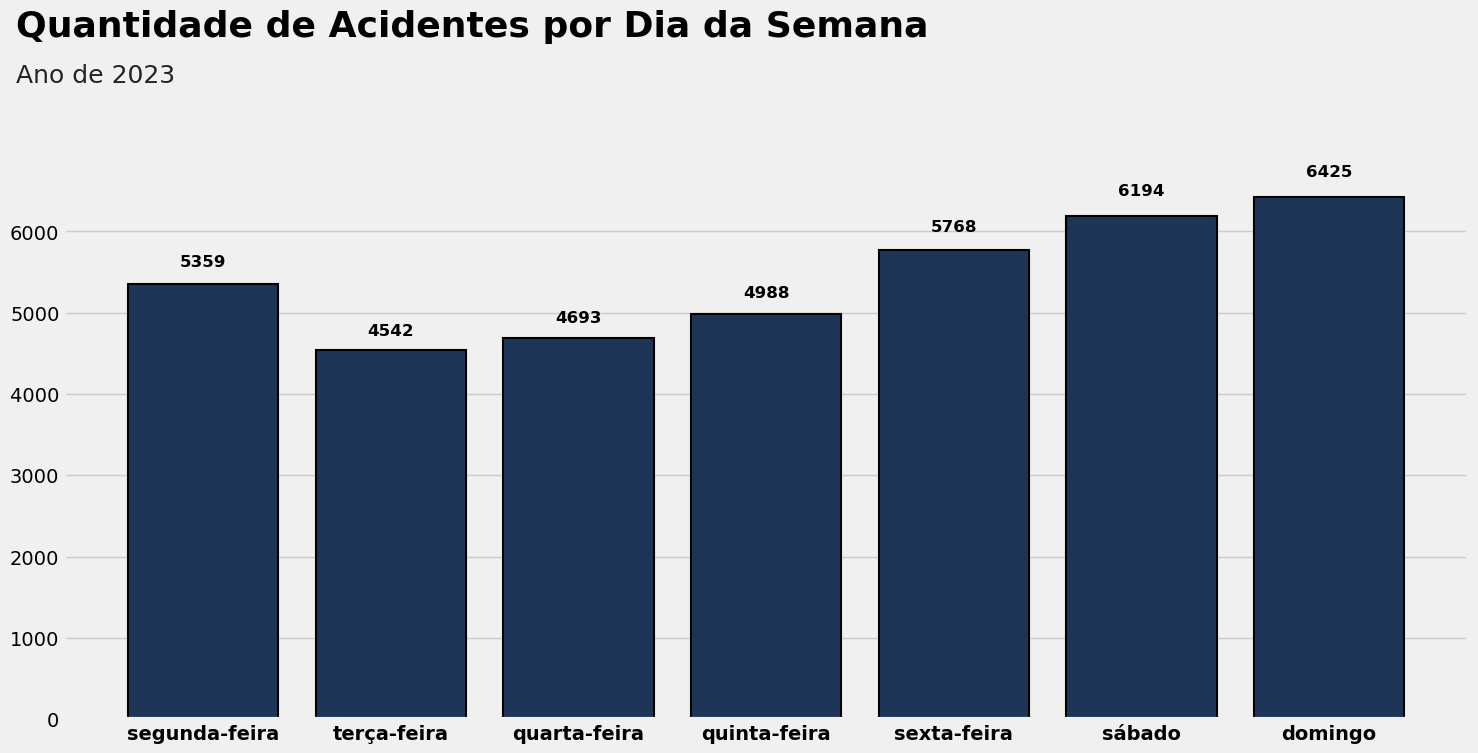

In [11]:
height = df_alterado['data'].dt.weekday.value_counts().sort_index().values
dias_semana = ['segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira', 'sexta-feira', 'sábado', 'domingo']

plot_bar(dias_semana, height,
         titulo = 'Quantidade de Acidentes por Dia da Semana', subtitulo = "Ano de 2023", 
         titulo_x_pos = -1);

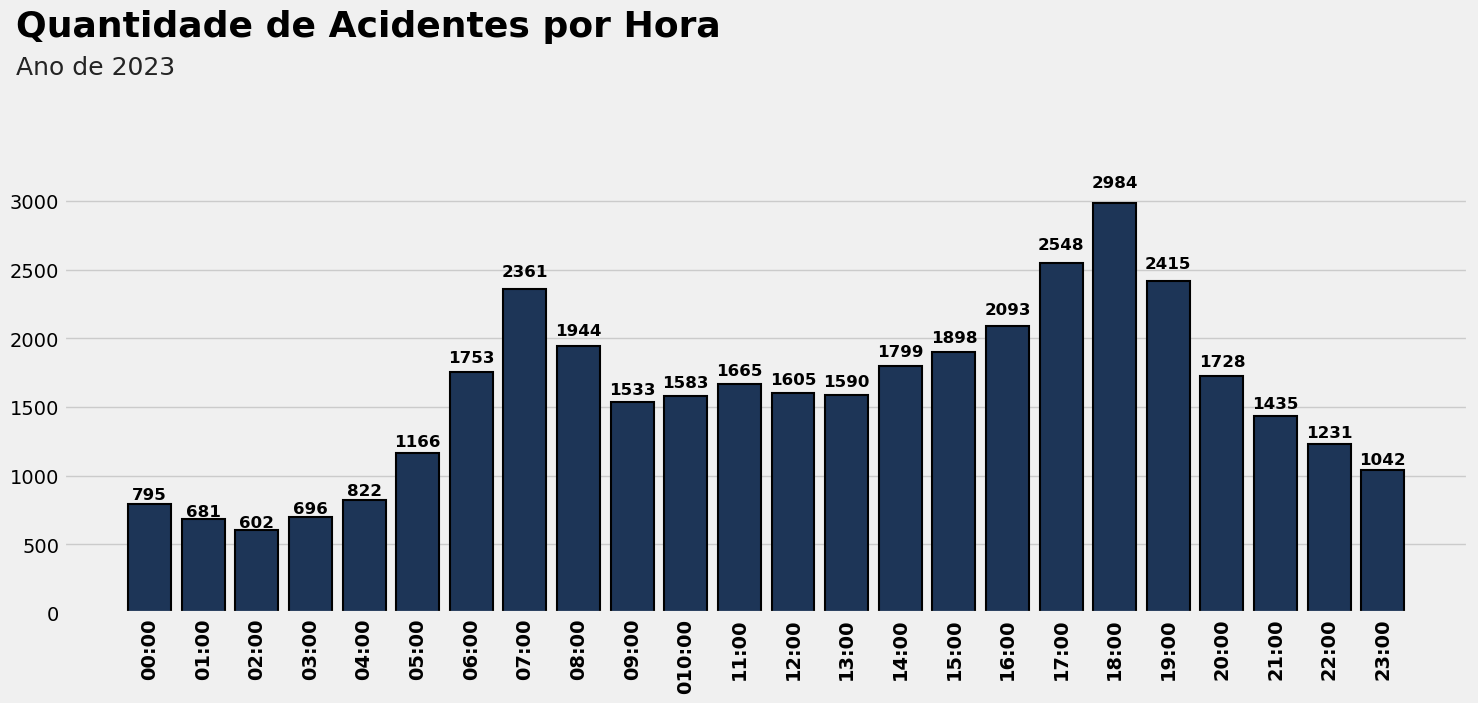

In [12]:
height = df_alterado['horario'].dt.hour.value_counts().sort_index().values
horas = [(str(hour) + ":00") if hour > 10 else ("0" + str(hour) + ":00") for hour in range(0,24)]

plot_bar(horas, height,
         titulo = 'Quantidade de Acidentes por Hora', subtitulo = "Ano de 2023", 
         titulo_x_pos = -2.5, rotation = 90);

In [76]:
def plot_hbar(y, width, titulo, subtitulo = "", colors = colors_ref[0], rotation = 0, legend = "", y_labels = "", titulo_x_pos = 0, titulo_y_pos = 0,
            display_data = "", height = 0.8, width_size = 15, fmt = "", total = ""):
    
    y_ = y
    width_ = width
    legend_ = legend
    colors_ = colors
    rotation_ = rotation
    titulo_ = titulo
    subtitulo_ = subtitulo
    titulo_x_pos_ = titulo_x_pos
    titulo_y_pos_ = titulo_y_pos
    display_data_ = display_data
    height_ = height
    width_size_ = width_size
    
    if width_size != 15:
        width_size_ = width_size
    
    fig, ax = plt.subplots(figsize=(width_size_,8));
    
    container = ax.barh(y = y_, 
                       width = width_, 
                       label = legend_,
                       color = colors_, 
                       height = height_,               
                       edgecolor="black",
                       linewidth=1.5,);
    
    
    if total == "":
        total_ = width
    else:
        total_ = total
    
    if fmt == "":
        fmt_ = '{:.0f}'
    else:
        fmt_ = lambda x: '{:.1f}%'.format((x*100)/sum(total_))

    ax.bar_label(container, 
                 padding = 8, 
                 weight = 'bold', 
                 fmt = fmt_)
    
    if y_labels != "":
        y_labels_ = y_labels
    else:
        y_labels_ = ax.get_yticklabels()
    
    ax.set_yticklabels(labels = y_labels_, 
                       rotation = rotation_,
                       fontsize = 12,
                       weight = 'bold');
    
    if titulo_x_pos != 0:
        titulo_x_pos_ = titulo_x_pos
    else:
        titulo_x_pos_ = -2
    
    if titulo_y_pos != 0:
        titulo_y_pos_ = titulo_y_pos
    else: 
        titulo_y_pos_ = max(ax.get_yticks())
    
    ax.text(x = titulo_x_pos_ , y = titulo_y_pos_ * 1.2, 
            s = titulo_, 
            fontsize = 26, 
            weight = 'bold')
    
    ax.text(x = titulo_x_pos_ , y = titulo_y_pos_ * 1.11, 
            s = subtitulo_, 
            fontsize = 18,  
            alpha = .85)

    if legend_ != "":
        ax.legend(loc="right");
    
    ax.yaxis.grid(False);
    
    ax.vlines(x=0, 
              ymin = (container[0].get_y() - height_/2), 
              ymax = (container[-1].get_y() + height_), 
              colors = "black")
    
    plt.tight_layout();
    plt.show();

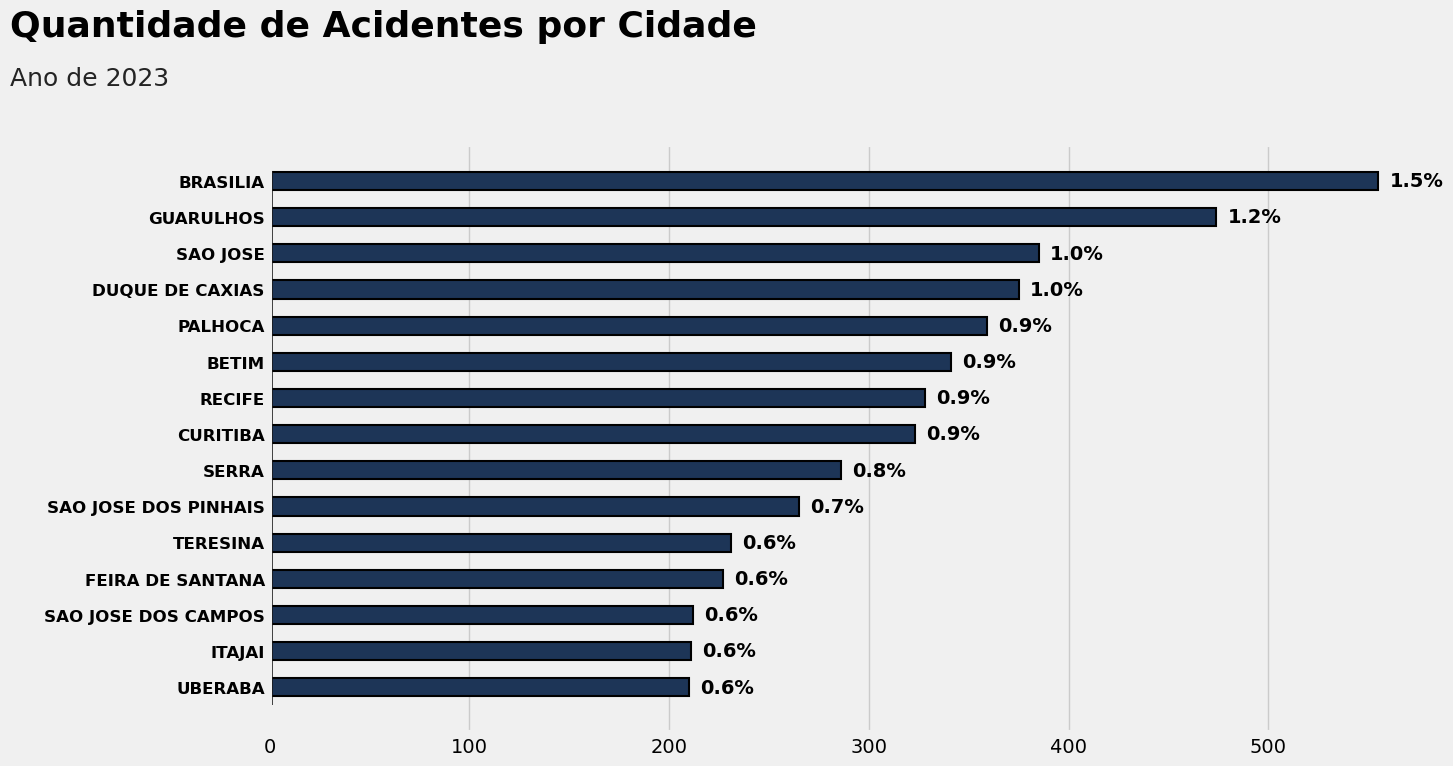

In [79]:
municipio = df_alterado["municipio"].value_counts().sort_values(ascending=True).tail(15).index
width = df_alterado["municipio"].value_counts().sort_values(ascending=True).tail(15).values

plot_hbar(municipio, width,
                titulo = 'Quantidade de Acidentes por Cidade', subtitulo = "Ano de 2023",
                titulo_x_pos = -130, titulo_y_pos = 15, 
                height = 0.5, 
                fmt = "percentage", total = df_alterado["municipio"].value_counts().sort_values(ascending=True).values
                );

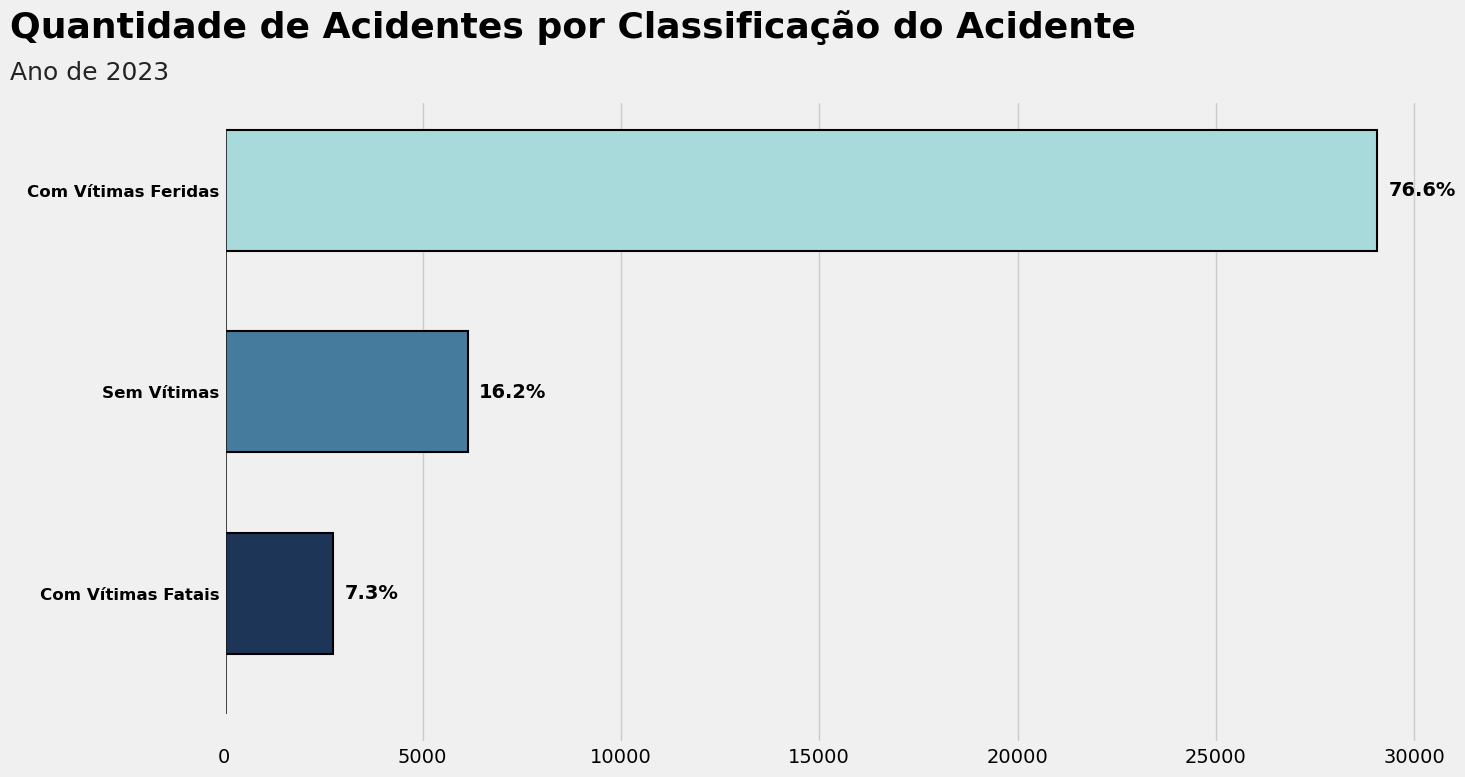

In [14]:
width = df_alterado['classificacao_acidente'].value_counts().sort_values(ascending=True).values
classificacao_acidente = df_alterado['classificacao_acidente'].value_counts().sort_values(ascending=True).index

plot_hbar(classificacao_acidente, width,
         titulo = 'Quantidade de Acidentes por Classificação do Acidente', subtitulo = "Ano de 2023",
         colors = colors_ref,
         titulo_x_pos = -5400, titulo_y_pos = 2.3, 
         height = 0.6);

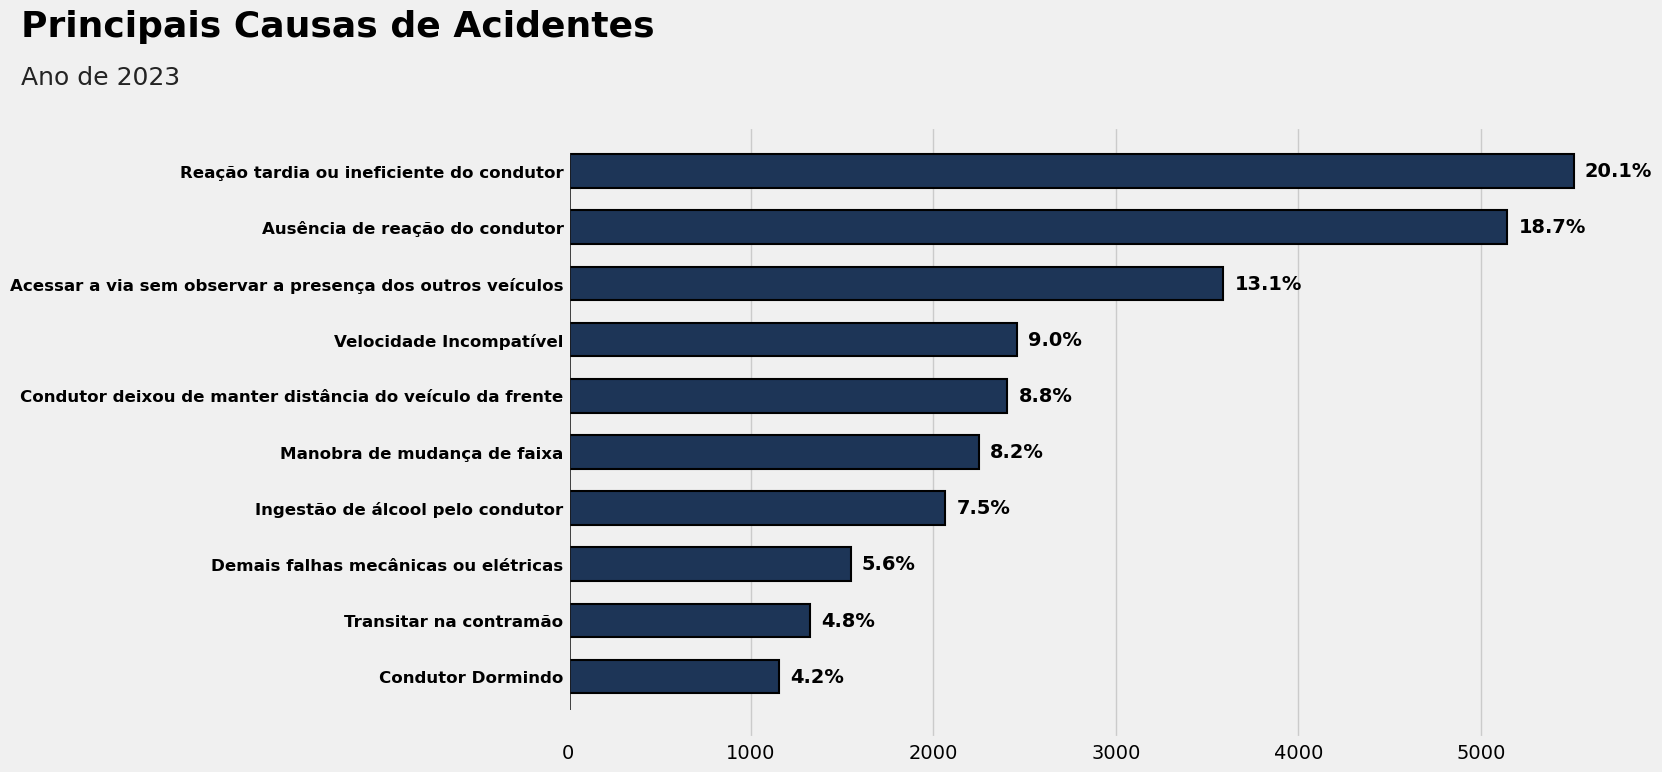

In [64]:
width = df_alterado['causa_acidente'].value_counts().head(10).sort_values().values
causas_acidentes = df_alterado['causa_acidente'].value_counts().head(10).sort_values().index

plot_hbar(causas_acidentes, width,
         titulo = 'Principais Causas de Acidentes', subtitulo = "Ano de 2023",
         titulo_x_pos = -3000, titulo_y_pos = 9.5, 
         colors = colors_ref[0],
         height = 0.6,
         width_size = 20);

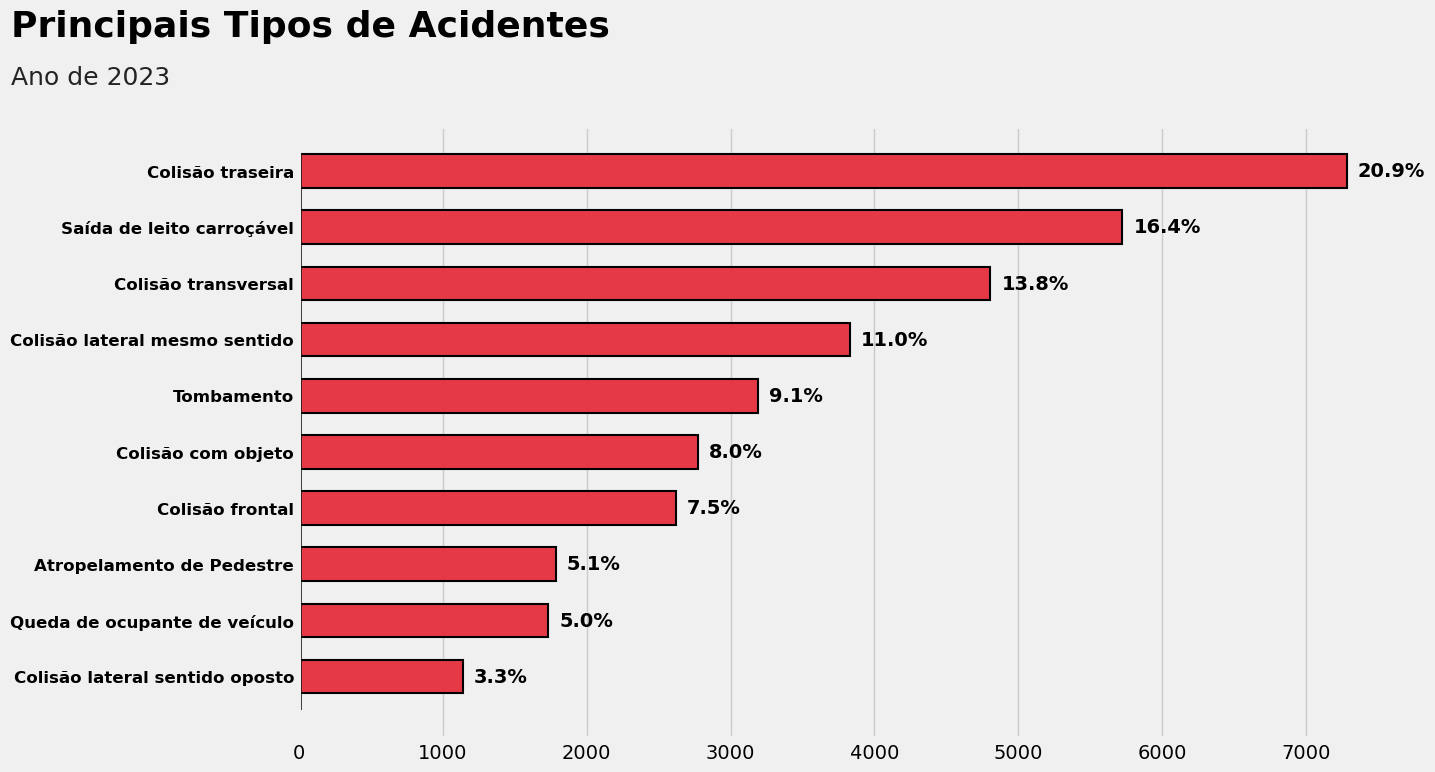

In [16]:
width = df_alterado['tipo_acidente'].value_counts().head(10).sort_values().values
causas_acidentes = df_alterado['tipo_acidente'].value_counts().head(10).sort_values().index

plot_hbar(causas_acidentes, width,
         titulo = 'Principais Tipos de Acidentes', subtitulo = "Ano de 2023",
         titulo_x_pos = -2000, titulo_y_pos = 9.5, 
         colors = colors_ref[3],
         height = 0.6);

In [17]:
df_alterado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37969 entries, 0 to 38407
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      37969 non-null  int64         
 1   data                    37969 non-null  datetime64[ns]
 2   dia_semana              37969 non-null  object        
 3   horario                 37969 non-null  datetime64[ns]
 4   uf                      37969 non-null  object        
 5   br                      37969 non-null  object        
 6   km                      37969 non-null  object        
 7   municipio               37969 non-null  object        
 8   causa_acidente          37969 non-null  object        
 9   tipo_acidente           37969 non-null  object        
 10  classificacao_acidente  37969 non-null  object        
 11  fase_dia                37969 non-null  object        
 12  sentido_via             37969 non-null  object

In [18]:
def plot_stacked_bar(x, dict_heights, titulo, subtitulo = "", colors = colors_ref[0], rotation = 0, legend = "", x_labels = "", titulo_x_pos = 0, titulo_y_pos = 0,
            display_data = "", width = 0.8):
    
    x_ = x
    dict_heights_ = dict_heights
    legend_ = legend
    colors_ = colors
    rotation_ = rotation
    titulo_ = titulo
    subtitulo_ = subtitulo
    titulo_x_pos_ = titulo_x_pos
    titulo_y_pos_ = titulo_y_pos
    display_data_ = display_data
    width_ = width
    
    fig, ax = plt.subplots();
    
    base = np.zeros(len(x_))

    for i, (classificacao, dict_height) in enumerate(dict_heights_.items()):
        container = ax.bar(x = x_, 
                           height = dict_height, 
                           label = classificacao,
                           bottom = base,
                           color = colors_[i],
                           edgecolor="black",
                           linewidth=1.5,
                           width = width_);

        base += dict_height
        
    ax.bar_label(container, 
                 padding = 8)

    if x_labels != "":
        x_labels_ = x_labels
    else:
        x_labels_ = ax.get_xticklabels()
    
    ax.set_xticklabels(labels = x_labels_, 
                       rotation = rotation_,
                       weight = 'bold');
    
    if titulo_x_pos != 0:
        titulo_x_pos_ = titulo_x_pos
    else:
        titulo_x_pos_ = -2
    
    if titulo_y_pos != 0:
        titulo_y_pos_ = titulo_y_pos
    else: 
        titulo_y_pos_ = max(ax.get_yticks())
    
    ax.text(x = titulo_x_pos_ , y = titulo_y_pos_ * 1.2, 
            s = titulo_, 
            fontsize = 26, 
            weight = 'bold', horizontalalignment = "left")
    
    ax.text(x = titulo_x_pos_ , y = titulo_y_pos_ * 1.12, 
            s = subtitulo_, 
            fontsize = 18,  
            alpha = .85)
    
    if legend_ != "":
        ax.legend(labels=legend_)
    else:
        ax.legend()
        
    ax.xaxis.grid(False);
    
    plt.tight_layout();
    plt.show();

In [93]:
def plot_stacked_barh(y, dict_heights, titulo, subtitulo = "", colors = colors_ref[0], rotation = 0, legend = "", y_labels = "", titulo_x_pos = 0, titulo_y_pos = 0,
            display_data = "", height = 0.8):
    
    y_ = y
    dict_heights_ = dict_heights
    legend_ = legend
    colors_ = colors
    rotation_ = rotation
    titulo_ = titulo
    subtitulo_ = subtitulo
    titulo_x_pos_ = titulo_x_pos
    titulo_y_pos_ = titulo_y_pos
    display_data_ = display_data
    height_ = height
    
    fig, ax = plt.subplots();
    
    base = np.zeros(len(y_))

    for i, (classificacao, dict_height) in enumerate(dict_heights_.items()):
        container = ax.barh(y = y_, 
                           width = dict_height, 
                           label = classificacao,
                           left = base,
                           color = colors_[i],
                           edgecolor="black",
                           linewidth=1.5,
                           height = height_);

        base += dict_height
        
    ax.bar_label(container, 
                 padding = 8,                 
                 weight = 'bold', 
                 fmt = lambda x: '{:.1f}%'.format((x*100)/sum(base)))

    if y_labels != "":
        y_labels_ = y_labels
    else:
        y_labels_ = ax.get_yticklabels()
    
    ax.set_yticklabels(labels = y_labels_, 
                       rotation = rotation_,
                       weight = 'bold');
    
    if titulo_x_pos != 0:
        titulo_x_pos_ = titulo_x_pos
    else:
        titulo_x_pos_ = -2
    
    if titulo_y_pos != 0:
        titulo_y_pos_ = titulo_y_pos
    else: 
        titulo_y_pos_ = max(ax.get_yticks())
    
    ax.text(x = titulo_x_pos_ , y = titulo_y_pos_ * 1.2, 
            s = titulo_, 
            fontsize = 26, 
            weight = 'bold', horizontalalignment = "left")
    
    ax.text(x = titulo_x_pos_ , y = titulo_y_pos_ * 1.12, 
            s = subtitulo_, 
            fontsize = 18,  
            alpha = .85)
    
    if legend_ != "":
        ax.legend(labels=legend_, loc = "lower right", frameon=True, fancybox=True, shadow=True)
    else:
        ax.legend()
        
    ax.yaxis.grid(False);
    
    ax.vlines(x=0, 
              ymin = (container[0].get_y() - height_/2), 
              ymax = (container[-1].get_y() + height_), 
              colors = "black")
    
    plt.tight_layout();
    plt.show();

In [94]:
tipo_pista = df_alterado['fase_dia'].value_counts().sort_values(ascending=True).index[:16]
dict_tipo_pista = df_alterado.groupby('fase_dia').sum().to_dict()
stacks = ['ilesos','feridos_leves', 'feridos_graves', 'mortos']

dict_stacks = {key: [dict_tipo_pista[key][k] for k in tipo_pista] for key in stacks}

plot_stacked_barh(tipo_pista, dict_stacks, 
                 titulo = 'Quantidade de Acidentes por Fase do Dia', subtitulo = "Ano de 2023", 
                 titulo_x_pos = -4500, titulo_y_pos = 3.5, 
                 colors = ['#a8dadc', '#457b9d', '#1d3557', '#e63946'],
                 height = 0.5,
                 total = df_alterado['fase_dia'].value_counts().sort_values(ascending=True).values)

TypeError: plot_stacked_barh() got an unexpected keyword argument 'total'

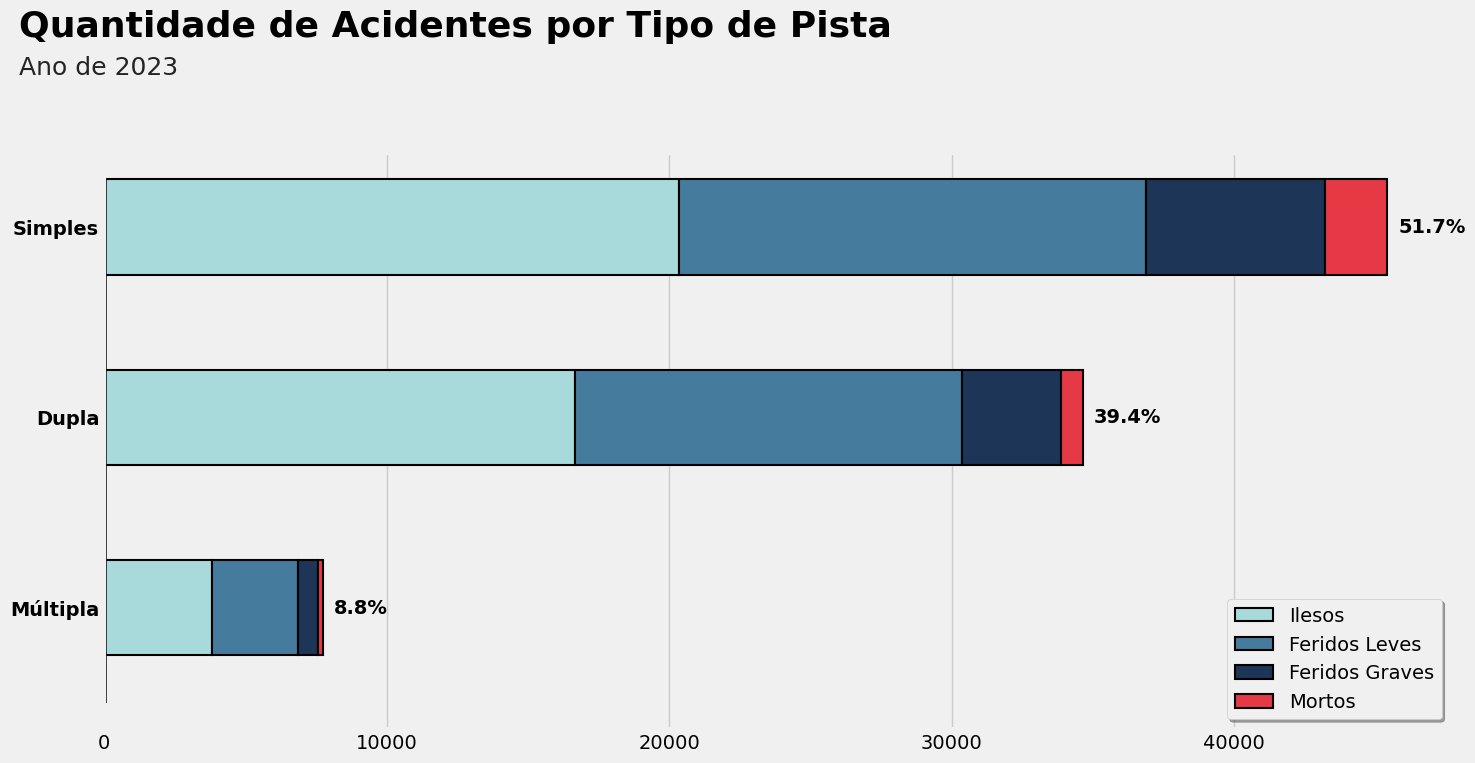

In [95]:
tipo_pista = df_alterado['tipo_pista'].value_counts().sort_values(ascending=True).index
dict_tipo_pista = df_alterado.groupby('tipo_pista').sum().to_dict()
stacks = ['ilesos','feridos_leves', 'feridos_graves', 'mortos']

dict_stacks = {key: [dict_tipo_pista[key][k] for k in tipo_pista] for key in stacks}

plot_stacked_barh(tipo_pista, dict_stacks, 
                 titulo = 'Quantidade de Acidentes por Tipo de Pista', subtitulo = "Ano de 2023", 
                 titulo_x_pos = -3000, titulo_y_pos = 2.5, 
                 colors = ['#a8dadc', '#457b9d', '#1d3557', '#e63946'],
                 legend = ['Ilesos','Feridos Leves', 'Feridos Graves', 'Mortos'],
                 height = 0.5)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38408 entries, 0 to 38407
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      38408 non-null  int64  
 1   data_inversa            38408 non-null  object 
 2   dia_semana              38408 non-null  object 
 3   horario                 38408 non-null  object 
 4   uf                      38408 non-null  object 
 5   br                      38316 non-null  float64
 6   km                      38316 non-null  object 
 7   municipio               38408 non-null  object 
 8   causa_acidente          38408 non-null  object 
 9   tipo_acidente           38408 non-null  object 
 10  classificacao_acidente  38408 non-null  object 
 11  fase_dia                38408 non-null  object 
 12  sentido_via             38408 non-null  object 
 13  condicao_metereologica  38408 non-null  object 
 14  tipo_pista              38408 non-null

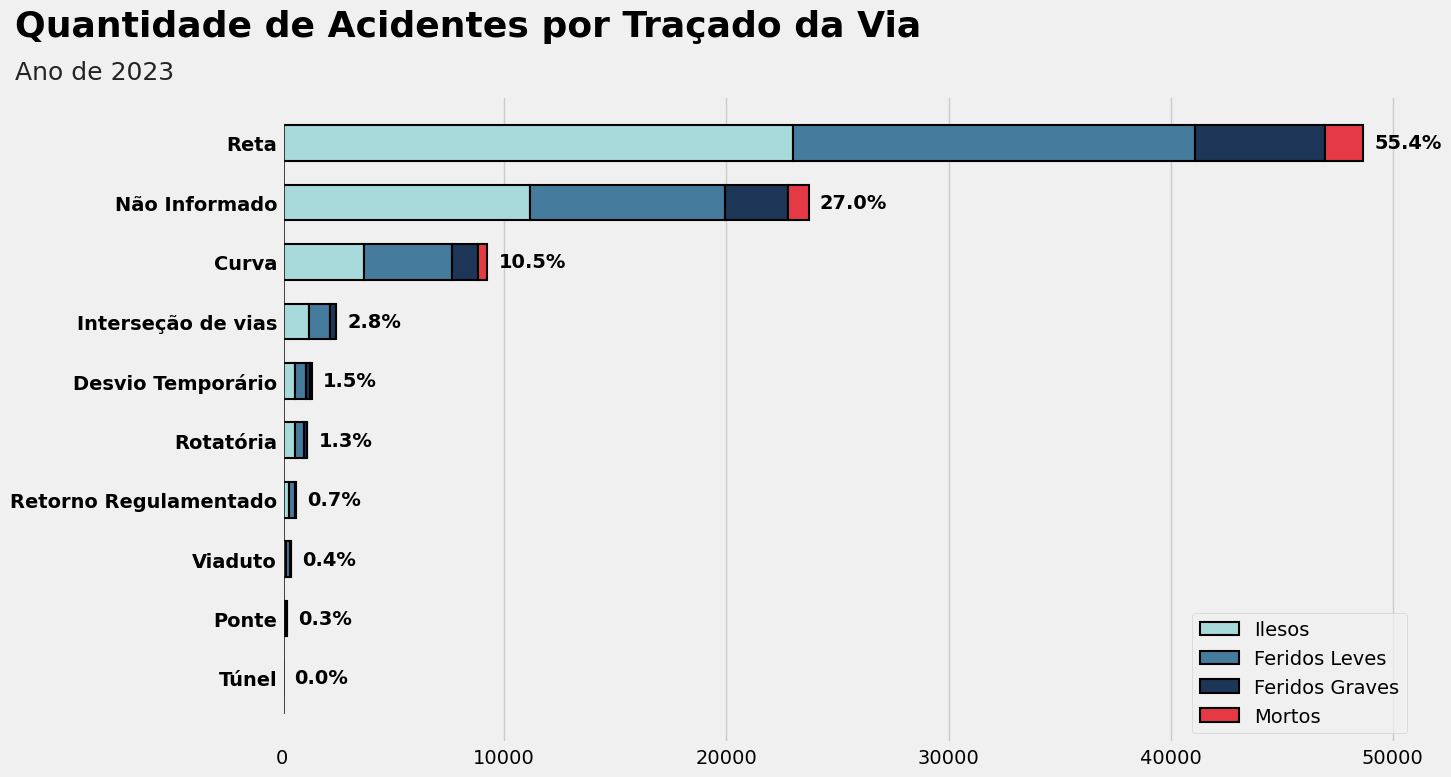

In [62]:
tipo_pista = df_alterado['tracado_via'].value_counts().sort_values(ascending=True).index
dict_tipo_pista = df_alterado.groupby('tracado_via').sum().to_dict()
stacks = ['ilesos','feridos_leves', 'feridos_graves', 'mortos']

dict_stacks = {key: [dict_tipo_pista[key][k] for k in tipo_pista] for key in stacks}

plot_stacked_barh(tipo_pista, dict_stacks, 
                 titulo = 'Quantidade de Acidentes por Traçado da Via', subtitulo = "Ano de 2023", 
                 titulo_x_pos = -12000, titulo_y_pos = 9, 
                 colors = ['#a8dadc', '#457b9d', '#1d3557', '#e63946'],
                 legend = ['Ilesos','Feridos Leves', 'Feridos Graves', 'Mortos'],
                 height = 0.6)